In [1]:
from os import getcwd, listdir
from os.path import join, dirname
from setfit import SetFitModel
import numpy as np
import pandas as pd
import re

PATH_DATA = join(getcwd(), 'data')
PATH_MODELS = join(getcwd(), 'models')

In [3]:
PATH_DATA = join(getcwd(), 'data')

val_data = pd.read_csv(join(PATH_DATA, 'val_hate.csv'))
texts = val_data.loc[:,'text'].values
labels = val_data.loc[:,'labels'].values

In [3]:
from sklearn.metrics import accuracy_score, f1_score


dirs = listdir(join(PATH_MODELS, 'setfit_hate_8'))

accs_dict = {}
f1_dict = {}

for num_samples in [8,16,32, 64]:
    accs = []
    f1 = []
    for dir in dirs:
        model = SetFitModel.from_pretrained(join(f"models/setfit_hate_{str(num_samples)}", dir), local_files_only=True)
        preds = model(texts)
        accs.append(accuracy_score(labels, preds))
        f1.append(f1_score(labels, preds))
    accs_dict[num_samples] = {}
    accs_dict[num_samples]['mean'] = np.mean(accs)
    accs_dict[num_samples]['mean'] = np.mean(accs)

    f1_dict[num_samples] = {}
    f1_dict[num_samples]['mean'] = np.mean(f1)
    f1_dict[num_samples]['mean'] = np.mean(f1)

In [12]:
from sklearn.metrics import accuracy_score, f1_score


dirs = listdir(join(PATH_MODELS, 'setfit_hate_8'))

accs_dict = {}
f1_dict = {}


for model_name in ['setfit', 'setfit_head']:
    accs_dict[model_name] = {}
    f1_dict[model_name] = {}
    for num_samples in [8, 16, 32, 64, 100]:
        accs = []
        f1 = []
        for dir in dirs:
            model = SetFitModel.from_pretrained(join(f"models/{model_name}_hate_{str(num_samples)}", dir), local_files_only=True)
            preds = model(texts)
            accs.append(accuracy_score(labels, preds))
            f1.append(f1_score(labels, preds))
        accs_dict[model_name][num_samples] = {}
        accs_dict[model_name][num_samples]['mean'] = np.mean(accs)
        accs_dict[model_name][num_samples]['std'] = np.std(accs)

        f1_dict[model_name][num_samples] = {}
        f1_dict[model_name][num_samples]['mean'] = np.mean(f1)
        f1_dict[model_name][num_samples]['std'] = np.std(f1)


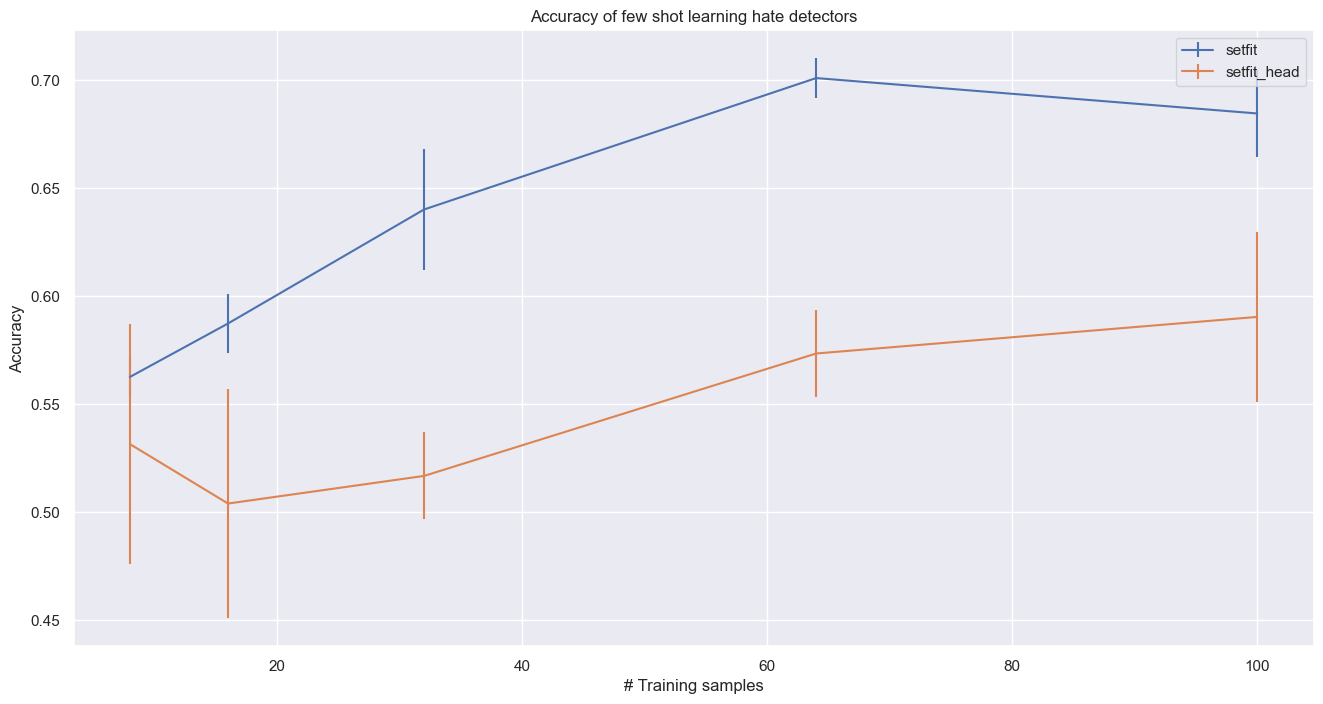

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()

plt.rcParams["figure.figsize"] = (16,8)

x = [8, 16, 32, 64, 100]
fig, ax = plt.subplots()

for name_model, metrics in accs_dict.items():
    accs = []
    accs_std = []
    for seed_num, acc in metrics.items():
        accs.append(acc['mean'])
        accs_std.append(acc['std'])

    ax.errorbar(x, accs, accs_std, label=f'{name_model}')

ax.set_xlabel('# Training samples')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy of few shot learning hate detectors')
plt.legend()
plt.show()